In [115]:
import tensorflow as tf
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [116]:
import numpy as np

In [117]:
X,y=make_regression(n_features=5,random_state=42)

In [118]:
x=tf.constant(X,dtype=np.float64)
y=tf.constant(y.reshape(-1,1),dtype=np.float64)

In [119]:
one=tf.constant(np.ones([X.shape[0],1]),dtype=np.float64)

In [120]:
x_mod=tf.concat([one,x],axis=1)

In [121]:
theta=tf.Variable(np.zeros([x_mod.shape[1],1]),dtype=np.float64)

In [122]:
theta

<tf.Variable 'Variable:0' shape=(6, 1) dtype=float64, numpy=
array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])>

In [123]:
train_steps = 10
learning_rate = 0.1

In [124]:
@tf.function
def func(x,y):
    with tf.GradientTape() as tape:
        yp=tf.matmul(x,theta)
        error=yp-y
        print(error)
        loss=tf.reduce_mean(error**2)
    
    dt=tape.gradient(loss,theta)
    theta.assign_sub(learning_rate*dt)
    return loss

In [125]:
err=[]
for i in range(train_steps):
    err.append((func(x_mod,y)))

Tensor("sub:0", shape=(100, 1), dtype=float64)


In [126]:
err

[<tf.Tensor: shape=(), dtype=float64, numpy=19653.9920015488>,
 <tf.Tensor: shape=(), dtype=float64, numpy=12896.161116150439>,
 <tf.Tensor: shape=(), dtype=float64, numpy=8596.09423649375>,
 <tf.Tensor: shape=(), dtype=float64, numpy=5815.732671648925>,
 <tf.Tensor: shape=(), dtype=float64, numpy=3989.137869349391>,
 <tf.Tensor: shape=(), dtype=float64, numpy=2770.4928797137673>,
 <tf.Tensor: shape=(), dtype=float64, numpy=1945.531608380022>,
 <tf.Tensor: shape=(), dtype=float64, numpy=1379.5199448584262>,
 <tf.Tensor: shape=(), dtype=float64, numpy=986.4249724618077>,
 <tf.Tensor: shape=(), dtype=float64, numpy=710.4514757037614>]

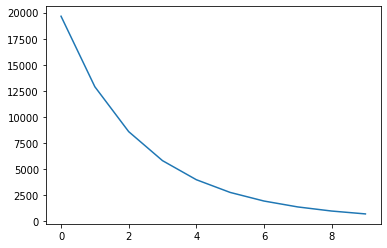

In [130]:
plt.figure()
plt.plot(err)


In [2]:
import tensorflow as tf
from sklearn.datasets import make_regression
import  numpy as np
import matplotlib.pyplot as plt

In [6]:
X,y=make_regression(n_features=1,random_state=42,noise=10)

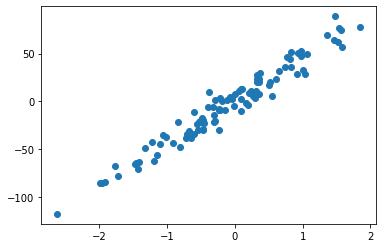

In [7]:
plt.scatter(X,y)

In [25]:
X_mod=tf.constant(X.flatten(),dtype=np.float64)
y=tf.constant(y,dtype=np.float64)

In [50]:
m=tf.Variable(2312.0,dtype=np.float64)
c=tf.Variable(1231.0,dtype=np.float64)

In [57]:
lr=0.1
maxstep=50

In [58]:
@tf.function
def lin_reg(X,y):
    with tf.GradientTape() as tape:
        yp=(m*X) + c
        error=yp-y
        loss=tf.reduce_mean(error**2)
        
    dm,dc=tape.gradient(loss,[m,c])
    m.assign_sub(lr*dm)
    c.assign_sub(lr*dc)
    return loss

In [59]:
err=[]
for i in range(maxstep):
    err.append(lin_reg(X_mod,y))

In [62]:
#err

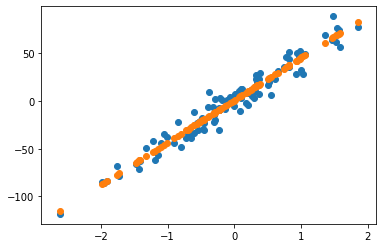

In [61]:
plt.scatter(X,y)
plt.scatter(X,(m*X)+c)